# K-means clustering

## import library

In [347]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [348]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

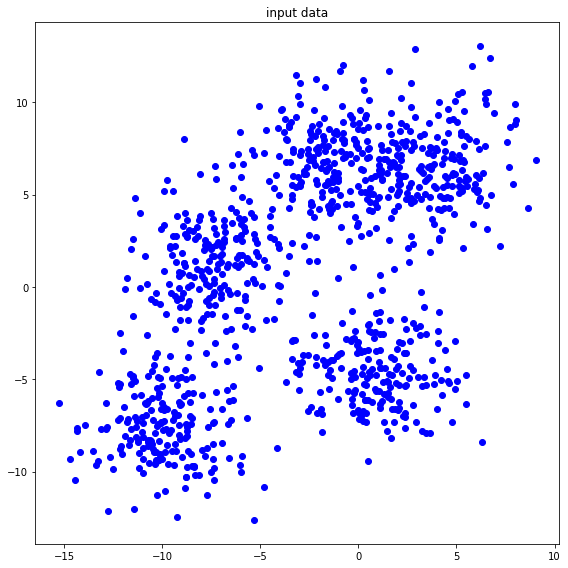

In [349]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [350]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    dif = feature - np.tile(center, reps=(number_data, 1))
    distance = (((dif**2).sum(axis=1))**(1/2)).reshape(-1, 1)    


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [351]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    feature_by_label = feature[label_feature.reshape(-1,1)[:,0] == label]
    if feature_by_label.size == 0:
        return np.zeros((1, feature.shape[1]))
    centroid = feature_by_label.sum(axis = 0) / feature_by_label.shape[0]

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [352]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cat = []
    for i in range(distance.shape[0]):
        cat.append(np.where(distance[i] == distance[i].min())[0])
    label_feature = np.array(cat)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [353]:
number_cluster          = 2
number_iteration        = 100     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [354]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
# label_feature_02[:int(number_data/2)] = np.zeros(int(number_data/2), dtype=int)
# label_feature_02[int(number_data/2):] = np.ones(int((number_data+1)/2), dtype=int)
for i in range(number_iteration):
    label_distance = []
    label_centroid = []
    for label in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_02, label)
        if(np.count_nonzero(label_feature_02 == label) == 0):
            centroid = centroid_iteration_02[i-1][label]
        distance = compute_distance(feature, centroid)
        label_centroid.append(centroid)
        label_distance.append(distance)
    centroids = np.array(label_centroid)
    distances = np.concatenate(label_distance, axis = 1)
    label_feature_02 = compute_label(distances).reshape(-1,)
    arr = np.arange(number_data)
    loss = distances[[arr], [label_feature_02]]
    loss_iteration_02[i] = (1 / number_data) * loss.sum()
    centroid_iteration_02[i] = centroids
    

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [355]:
number_cluster          = 4
number_iteration        = 400     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [356]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    label_distance = []
    label_centroid = []
    for label in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_04, label)
        if(np.count_nonzero(label_feature_04 == label) == 0):
            centroid = centroid_iteration_04[i-1][label]
        distance = compute_distance(feature, centroid)
        label_centroid.append(centroid)
        label_distance.append(distance)
    centroids = np.array(label_centroid)
    distances = np.concatenate(label_distance, axis = 1)
    label_feature_04 = compute_label(distances).reshape(-1,)
    arr = np.arange(number_data)
    loss = distances[[arr], [label_feature_04]]
    loss_iteration_04[i] = (1 / number_data) * loss.sum()
    centroid_iteration_04[i] = centroids

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [357]:
number_cluster          = 8
number_iteration        = 800     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [358]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    label_distance = []
    label_centroid = []
    for label in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_08, label)
        if(np.count_nonzero(label_feature_08 == label) == 0):
            centroid = centroid_iteration_08[i-1][label]
        distance = compute_distance(feature, centroid)
        label_centroid.append(centroid)
        label_distance.append(distance)
    centroids = np.array(label_centroid)
    distances = np.concatenate(label_distance, axis = 1)
    label_feature_08 = compute_label(distances).reshape(-1,)
    arr = np.arange(number_data)
    loss = distances[[arr], [label_feature_08]]
    loss_iteration_08[i] = (1 / number_data) * loss.sum()
    centroid_iteration_08[i] = centroids

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [359]:
number_cluster          = 16
number_iteration        = 1000     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [360]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    label_distance = []
    label_centroid = []
    for label in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_16, label)
        if(np.count_nonzero(label_feature_16 == label) == 0):
            centroid = centroid_iteration_16[i-1][label]
        distance = compute_distance(feature, centroid)
        label_centroid.append(centroid)
        label_distance.append(distance)
    centroids = np.array(label_centroid)
    distances = np.concatenate(label_distance, axis = 1)
    label_feature_16 = compute_label(distances).reshape(-1,)
    arr = np.arange(number_data)
    loss = distances[[arr], [label_feature_16]]
    loss_iteration_16[i] = (1 / number_data) * loss.sum()
    centroid_iteration_16[i] = centroids

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [361]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [362]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [363]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [364]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [365]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [366]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [367]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [368]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [369]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(centroid_iteration_02[0,:,0], centroid_iteration_02[0,:,1], color = 'blue', label = 'initial')
    plt.scatter(centroid_iteration_02[-1,:,0], centroid_iteration_02[-1,:,1], marker = 's', color = 'red', label = 'final')
    plt.plot(centroid_iteration_02[:,0,0], centroid_iteration_02[:,0,1], color = 'red', label = 'cluster=0')
    plt.plot(centroid_iteration_02[:,1,0], centroid_iteration_02[:,1,1], color = 'blue', label = 'cluster=1')
    plt.legend()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [370]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(centroid_iteration_04[0,:,0], centroid_iteration_04[0,:,1], color = 'blue', label = 'initial')
    plt.scatter(centroid_iteration_04[-1,:,0], centroid_iteration_04[-1,:,1], marker = 's', color = 'red', label = 'final')
    plt.plot(centroid_iteration_04[:,0,0], centroid_iteration_04[:,0,1], color = 'red', label = 'cluster=0')
    plt.plot(centroid_iteration_04[:,1,0], centroid_iteration_04[:,1,1], color = 'blue', label = 'cluster=1')
    plt.plot(centroid_iteration_04[:,2,0], centroid_iteration_04[:,2,1], color = 'coral', label = 'cluster=2')
    plt.plot(centroid_iteration_04[:,3,0], centroid_iteration_04[:,3,1], color = 'chocolate', label = 'cluster=3')
    plt.legend()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [371]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(centroid_iteration_08[0,:,0], centroid_iteration_08[0,:,1], color = 'blue', label = 'initial')
    plt.scatter(centroid_iteration_08[-1,:,0], centroid_iteration_08[-1,:,1], marker = 's', color = 'red', label = 'final')
    plt.plot(centroid_iteration_08[:,0,0], centroid_iteration_08[:,0,1], color = 'red', label = 'cluster=0')
    plt.plot(centroid_iteration_08[:,1,0], centroid_iteration_08[:,1,1], color = 'blue', label = 'cluster=1')
    plt.plot(centroid_iteration_08[:,2,0], centroid_iteration_08[:,2,1], color = 'coral', label = 'cluster=2')
    plt.plot(centroid_iteration_08[:,3,0], centroid_iteration_08[:,3,1], color = 'chocolate', label = 'cluster=3')
    plt.plot(centroid_iteration_08[:,4,0], centroid_iteration_08[:,4,1], color = 'ivory', label = 'cluster=4')
    plt.plot(centroid_iteration_08[:,5,0], centroid_iteration_08[:,5,1], color = 'salmon', label = 'cluster=5')
    plt.plot(centroid_iteration_08[:,6,0], centroid_iteration_08[:,6,1], color = 'sienna', label = 'cluster=6')
    plt.plot(centroid_iteration_08[:,7,0], centroid_iteration_08[:,7,1], color = 'skyblue', label = 'cluster=7')
    plt.legend()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [372]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(centroid_iteration_16[0,:,0], centroid_iteration_16[0,:,1], color = 'blue', label = 'initial')
    plt.scatter(centroid_iteration_16[-1,:,0], centroid_iteration_16[-1,:,1], marker = 's', color = 'red', label = 'final')
    plt.plot(centroid_iteration_16[:,0,0], centroid_iteration_16[:,0,1], color = 'red', label = 'cluster=0')
    plt.plot(centroid_iteration_16[:,1,0], centroid_iteration_16[:,1,1], color = 'blue', label = 'cluster=1')
    plt.plot(centroid_iteration_16[:,2,0], centroid_iteration_16[:,2,1], color = 'coral', label = 'cluster=2')
    plt.plot(centroid_iteration_16[:,3,0], centroid_iteration_16[:,3,1], color = 'chocolate', label = 'cluster=3')
    plt.plot(centroid_iteration_16[:,4,0], centroid_iteration_16[:,4,1], color = 'ivory', label = 'cluster=4')
    plt.plot(centroid_iteration_16[:,5,0], centroid_iteration_16[:,5,1], color = 'salmon', label = 'cluster=5')
    plt.plot(centroid_iteration_16[:,6,0], centroid_iteration_16[:,6,1], color = 'sienna', label = 'cluster=6')
    plt.plot(centroid_iteration_16[:,7,0], centroid_iteration_16[:,7,1], color = 'skyblue', label = 'cluster=7')
    plt.plot(centroid_iteration_16[:,8,0], centroid_iteration_16[:,8,1], color = 'yellow', label = 'cluster=8')
    plt.plot(centroid_iteration_16[:,9,0], centroid_iteration_16[:,9,1], color = 'olivedrab', label = 'cluster=9')
    plt.plot(centroid_iteration_16[:,10,0], centroid_iteration_16[:,10,1], color = 'yellowgreen', label = 'cluster=10')
    plt.plot(centroid_iteration_16[:,11,0], centroid_iteration_16[:,11,1], color = 'cyan', label = 'cluster=11')
    plt.plot(centroid_iteration_16[:,12,0], centroid_iteration_16[:,12,1], color = 'crimson', label = 'cluster=12')
    plt.plot(centroid_iteration_16[:,13,0], centroid_iteration_16[:,13,1], color = 'navy', label = 'cluster=13')
    plt.plot(centroid_iteration_16[:,14,0], centroid_iteration_16[:,14,1], color = 'darkviolet', label = 'cluster=14')
    plt.plot(centroid_iteration_16[:,15,0], centroid_iteration_16[:,15,1], color = 'tan', label = 'cluster=15')
    plt.legend()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [373]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks

    cmap = plt.cm.rainbow
    norm = colors.BoundaryNorm(np.arange(-0.5, 2, 1), cmap.N)

    plt.scatter(feature[label_feature_02.reshape(-1,1)[:,0] == 0][:,0], feature[label_feature_02.reshape(-1,1)[:,0] == 0][:,1],\
        c = np.zeros(np.count_nonzero(label_feature_02 == 0)), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_02.reshape(-1,1)[:,0] == 1][:,0], feature[label_feature_02.reshape(-1,1)[:,0] == 1][:,1],\
        c = np.ones(np.count_nonzero(label_feature_02 == 1)), cmap = cmap, norm = norm)
    plt.colorbar(ticks=np.linspace(0, 1, 2), label = "clusters")
    plt.show()


    # plt.colorbar(ticks = np.linspace(0,1,2), label = "clusters")
    # plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [374]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.cm.rainbow
    norm = colors.BoundaryNorm(np.arange(-0.5, 4, 1), cmap.N)

    plt.scatter(feature[label_feature_04.reshape(-1,1)[:,0] == 0][:,0], feature[label_feature_04.reshape(-1,1)[:,0] == 0][:,1],\
        c = np.zeros(np.count_nonzero(label_feature_04 == 0)), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_04.reshape(-1,1)[:,0] == 1][:,0], feature[label_feature_04.reshape(-1,1)[:,0] == 1][:,1],\
        c = np.ones(np.count_nonzero(label_feature_04 == 1)), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_04.reshape(-1,1)[:,0] == 2][:,0], feature[label_feature_04.reshape(-1,1)[:,0] == 2][:,1],\
        c = np.full(np.count_nonzero(label_feature_04 == 2), 2, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_04.reshape(-1,1)[:,0] == 3][:,0], feature[label_feature_04.reshape(-1,1)[:,0] == 3][:,1],\
        c = np.full(np.count_nonzero(label_feature_04 == 3), 3, dtype = int), cmap = cmap, norm = norm)
    plt.colorbar(ticks=np.linspace(0, 3, 4), label = "clusters")
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [375]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.cm.rainbow
    norm = colors.BoundaryNorm(np.arange(-0.5, 8, 1), cmap.N)

    plt.scatter(feature[label_feature_08.reshape(-1,1)[:,0] == 0][:,0], feature[label_feature_08.reshape(-1,1)[:,0] == 0][:,1],\
        c = np.zeros(np.count_nonzero(label_feature_08 == 0)), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_08.reshape(-1,1)[:,0] == 1][:,0], feature[label_feature_08.reshape(-1,1)[:,0] == 1][:,1],\
        c = np.ones(np.count_nonzero(label_feature_08 == 1)), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_08.reshape(-1,1)[:,0] == 2][:,0], feature[label_feature_08.reshape(-1,1)[:,0] == 2][:,1],\
        c = np.full(np.count_nonzero(label_feature_08 == 2), 2, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_08.reshape(-1,1)[:,0] == 3][:,0], feature[label_feature_08.reshape(-1,1)[:,0] == 3][:,1],\
        c = np.full(np.count_nonzero(label_feature_08 == 3), 3, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_08.reshape(-1,1)[:,0] == 4][:,0], feature[label_feature_08.reshape(-1,1)[:,0] == 4][:,1],\
        c = np.full(np.count_nonzero(label_feature_08 == 4), 4, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_08.reshape(-1,1)[:,0] == 5][:,0], feature[label_feature_08.reshape(-1,1)[:,0] == 5][:,1],\
        c = np.full(np.count_nonzero(label_feature_08 == 5), 5, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_08.reshape(-1,1)[:,0] == 6][:,0], feature[label_feature_08.reshape(-1,1)[:,0] == 6][:,1],\
        c = np.full(np.count_nonzero(label_feature_08 == 6), 6, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_08.reshape(-1,1)[:,0] == 7][:,0], feature[label_feature_08.reshape(-1,1)[:,0] == 7][:,1],\
        c = np.full(np.count_nonzero(label_feature_08 == 7), 7, dtype = int), cmap = cmap, norm = norm)
    plt.colorbar(ticks=np.linspace(0, 7, 8), label = "clusters")
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [376]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.cm.rainbow
    norm = colors.BoundaryNorm(np.arange(-0.5, 16, 1), cmap.N)

    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 0][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 0][:,1],\
        c = np.zeros(np.count_nonzero(label_feature_16 == 0)), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 1][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 1][:,1],\
        c = np.ones(np.count_nonzero(label_feature_16 == 1)), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 2][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 2][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 2), 2, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 3][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 3][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 3), 3, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 4][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 4][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 4), 4, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 5][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 5][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 5), 5, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 6][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 6][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 6), 6, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 7][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 7][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 7), 7, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 8][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 8][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 8), 8, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 9][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 9][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 9), 9, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 10][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 10][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 10), 10, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 11][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 11][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 11), 11, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 12][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 12][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 12), 12, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 13][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 13][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 13), 13, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 14][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 14][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 14), 14, dtype = int), cmap = cmap, norm = norm)
    plt.scatter(feature[label_feature_16.reshape(-1,1)[:,0] == 15][:,0], feature[label_feature_16.reshape(-1,1)[:,0] == 15][:,1],\
        c = np.full(np.count_nonzero(label_feature_16 == 15), 15, dtype = int), cmap = cmap, norm = norm)
    plt.colorbar(ticks=np.linspace(0, 15, 16), label = "clusters")
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  5.0930769025
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) =  2.8867264896
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  2.1123640117
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  1.6186843661
**************************************************
## [RESULT 05]
**************************************************


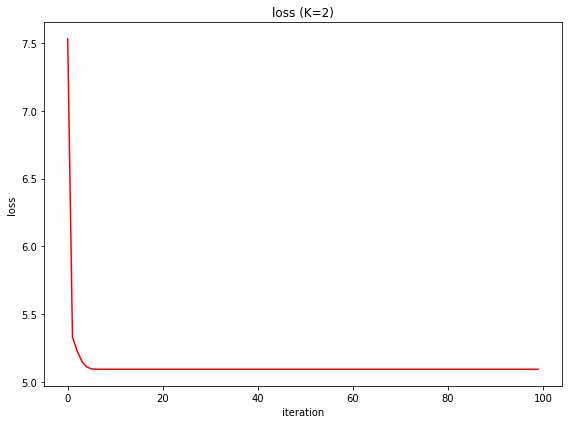

**************************************************
## [RESULT 06]
**************************************************


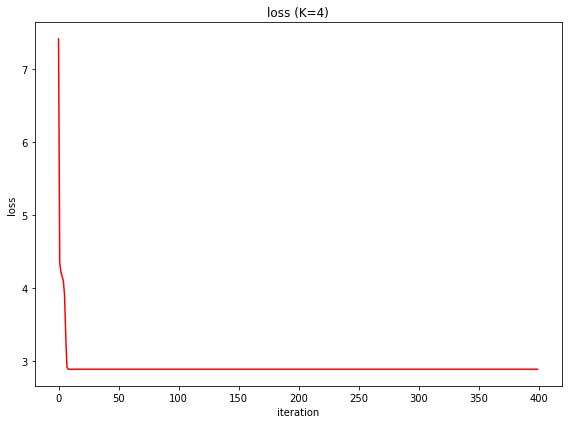

**************************************************
## [RESULT 07]
**************************************************


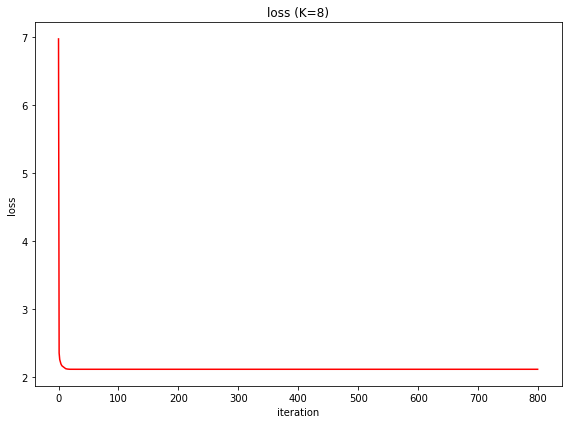

**************************************************
## [RESULT 08]
**************************************************


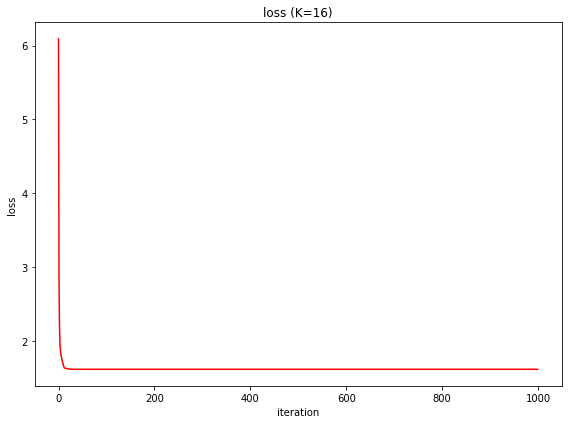

**************************************************
## [RESULT 09]
**************************************************


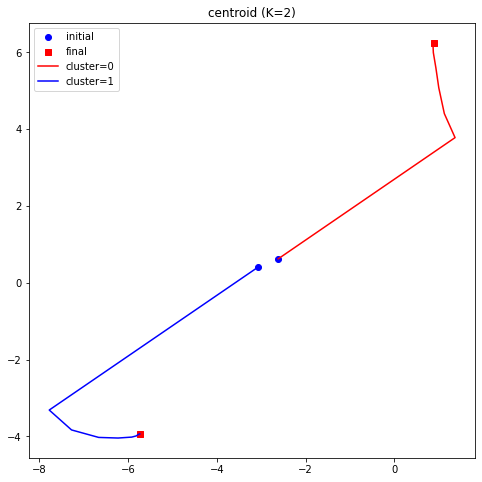

**************************************************
## [RESULT 10]
**************************************************


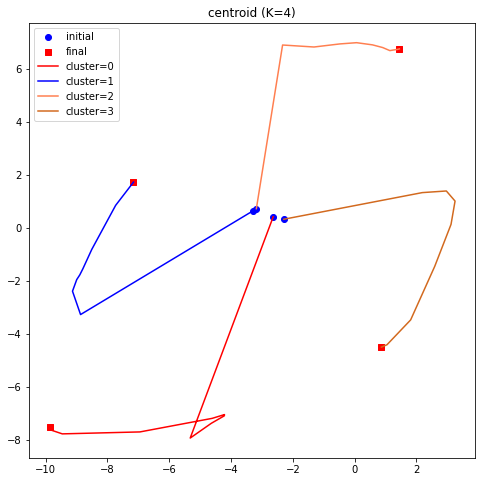

**************************************************
## [RESULT 11]
**************************************************


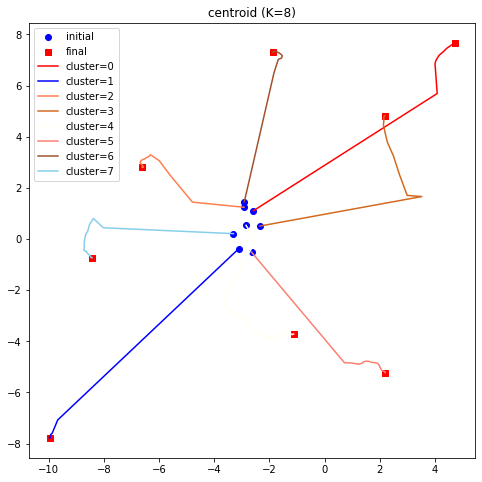

**************************************************
## [RESULT 12]
**************************************************


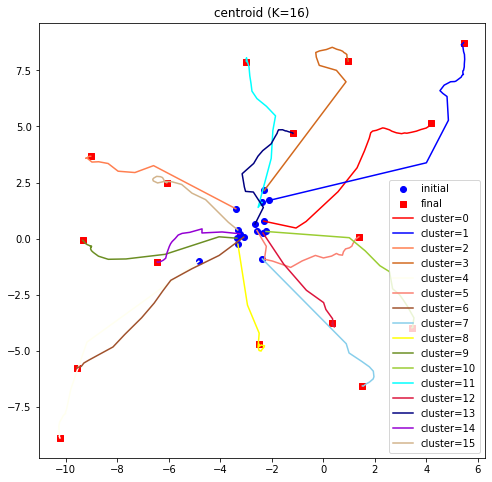

**************************************************
## [RESULT 13]
**************************************************


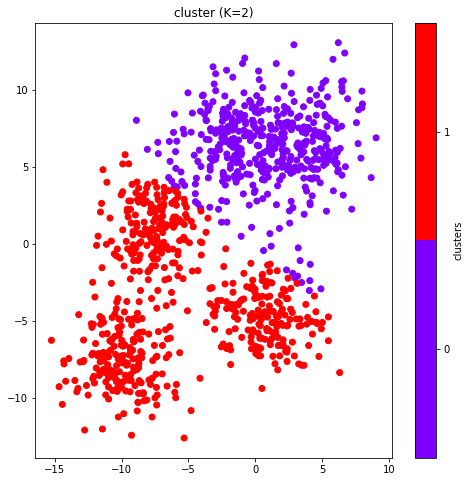

**************************************************
## [RESULT 14]
**************************************************


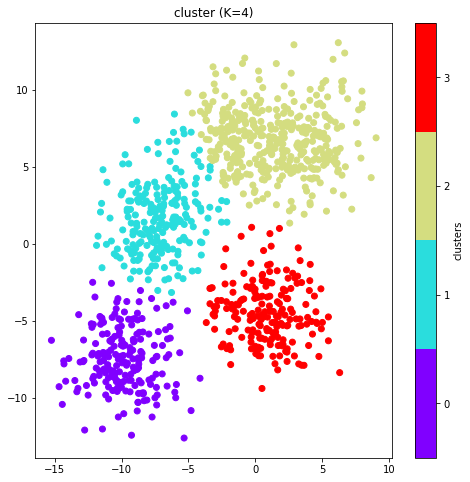

**************************************************
## [RESULT 15]
**************************************************


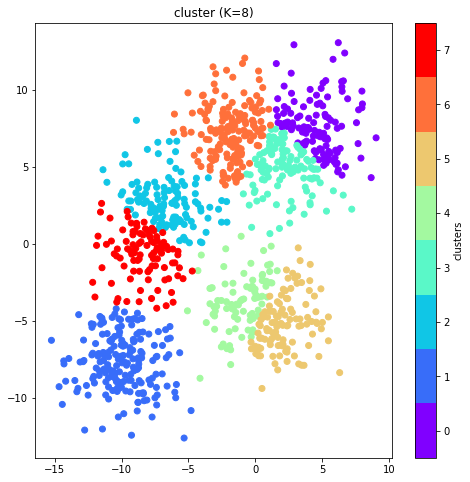

**************************************************
## [RESULT 16]
**************************************************


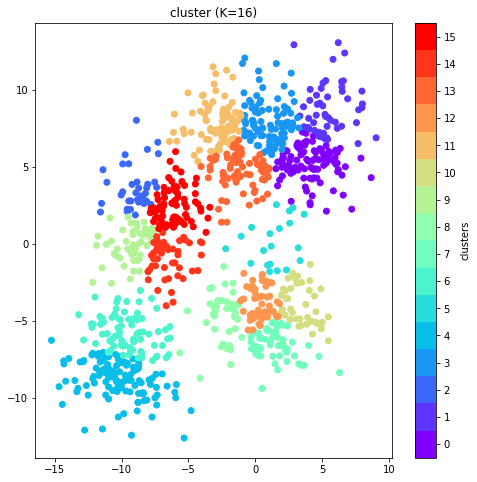

In [377]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)